In [ ]:
# 1.	Retype all above statements and run it to make sure you understand each function
%pwd
%cd /content
%ls
%cd drive/My Drive/Colab Notebooks
%ls
import pandas as pd
df = pd.read_csv("weather_data.csv")
df

df=pd.read_excel("weather_data.xlsx","Sheet1")
df

weather_data = {
    			'day': ['1/1/2017','1/2/2017','1/3/2017'],
   			 'temperature': [32,35,28],
   			 'windspeed': [6,7,2],
   			 'event': ['Rain', 'Sunny', 'Snow']
}
df = pd.DataFrame(weather_data)
df

weather_data = [ ('1/1/2017',32,6,'Rain'),
     ('1/2/2017',35,7,'Sunny'),    
    ('1/3/2017',28,2,'Snow') ] 
df = pd.DataFrame(data=weather_data,
columns=['day','temperature','windspeed','event'])
df

weather_data = [
    {'day': '1/1/2017', 'temperature': 32, 'windspeed': 6, 'event': 'Rain'},
    {'day': '1/2/2017', 'temperature': 35, 'windspeed': 7, 'event': 'Sunny'},
    {'day': '1/3/2017', 'temperature': 28, 'windspeed': 2, 'event': 'Snow'},
    
]
df = pd.DataFrame(data=weather_data,      columns=['day','temperature','windspeed','event'])
df


/content
Automobile_data.csv  stock_data.xlsx        weather_data_2.csv
new.csv              stocks_weather.xlsx    weather_data.csv
new.xlsx             weather_by_cities.csv  weather_data.xlsx
sample_data/         weather_data_1.csv
stock_data.csv       weather_data_1.xls
[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content
Automobile_data.csv  stock_data.xlsx        weather_data_2.csv
new.csv              stocks_weather.xlsx    weather_data.csv
new.xlsx             weather_by_cities.csv  weather_data.xlsx
sample_data/         weather_data_1.csv
stock_data.csv       weather_data_1.xls


,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


In [ ]:
# 2.	Read Write Excel CSV File
# -	Upload 2 files " stock_data.csv" & "stock_data.xlsx" to your google drive "My Drive/Colab Notebooks/"
# -	Mount google colab to your drive

import pandas as pd

df = pd.read_csv("stock_data.csv")
df

df = pd.read_csv("stock_data.csv", skiprows=1)
df

df = pd.read_csv("stock_data.csv", header=1) # skiprows and header are kind of same
df

df = pd.read_csv("stock_data.csv", header=None, names = ["ticker","eps","revenue","people"])
df

df = pd.read_csv("stock_data.csv",  nrows=2)
df

df = pd.read_csv("stock_data.csv", na_values=["n.a.", "not available"])
df


df = pd.read_csv("stock_data.csv",  na_values={
        'eps': ['not available'],
        'revenue': [-1],
        'people': ['not available','n.a.']
    })
df

df.to_csv("new.csv", index=False)

df.columns


df.to_csv("new.csv",header=False)
df.to_csv("new.csv", columns=["tickers","price"], index=False)

df = pd.read_excel("stock_data.xlsx","Sheet1")
df

def convert_people_cell(cell):
    if cell=="n.a.":
        return 'Sam Walton'
    return cell

def convert_price_cell(cell):
    if cell=="n.a.":
        return 50
    return cell
    
df = pd.read_excel("stock_data.xlsx","Sheet1", converters= {
        'people': convert_people_cell,
        'price': convert_price_cell
    })
df

df.to_excel("new.xlsx", sheet_name="stocks", index=False, startrow=2, startcol=1)

df_stocks = pd.DataFrame({
    'tickers': ['GOOGL', 'WMT', 'MSFT'],
    'price': [845, 65, 64 ],
    'pe': [30.37, 14.26, 30.97],
    'eps': [27.82, 4.61, 2.12]
})

df_weather =  pd.DataFrame({
    'day': ['1/1/2017','1/2/2017','1/3/2017'],
    'temperature': [32,35,28],
    'event': ['Rain', 'Sunny', 'Snow']
})

with pd.ExcelWriter('stocks_weather.xlsx') as writer:
    df_stocks.to_excel(writer, sheet_name="stocks")
    df_weather.to_excel(writer, sheet_name="weather")



In [ ]:
# 3.	Handle Missing Data: fillna, dropna, interpolate
# -	Upload 2 files "weather_data_1.csv " & " weather_data_1.xls" to your google drive "My Drive/Colab Notebooks/"
# -	Mount google colab to your drive
%cd /content/drive/My Drive/Colab Notebooks

import pandas as pd
df = pd.read_csv("weather_data_1.csv",parse_dates=['day'])
type(df.day[0])
df

df.set_index('day',inplace=True)
df

new_df = df.fillna(0)
new_df

new_df = df.fillna({ 'temperature': 0, 'windspeed': 0, 'event': 'No Event' }) 
new_df

new_df = df.fillna(method="ffill")
new_df

new_df = df.fillna(method="bfill")
new_df

new_df = df.fillna(method="bfill", axis="columns") 
# axis is either "index" or "columns"
new_df

new_df = df.fillna(method="ffill",limit=1)
new_df

new_df = df.interpolate()
new_df

new_df = df.interpolate(method="time") 
new_df

new_df = df.dropna() 
new_df

new_df = df.dropna(how='all')
new_df

new_df = df.dropna(thresh=1)
# any row/column with number of Non-NA value < thresh will be removed
new_df

dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df.reindex(idx)
df.head()

# Question: after processing missing data in each snippet, save it as a new file to your google drive

df.to_excel("new_file_q3.xlsx", sheet_name="After_processing_missing_Data", index=False, startrow=2, startcol=1)

with pd.ExcelWriter('new_file_q3.xlsx') as writer:
    df.to_excel(writer, sheet_name="After_processing_missing_Data")




In [ ]:
# 4.	Handle Missing Data: fillna, dropna, interpolate
# -	Upload 2 files "weather_data_2.csv" to your google drive "My Drive/Colab Notebooks/"
# -	Mount google colab to your drive
%cd /content/drive/My Drive/Colab Notebooks

import pandas as pd 
import numpy as np 
df = pd.read_csv("weather_data_2.csv") 
df

new_df = df.replace(-99999, value=np.NaN)
new_df

new_df = df.replace(to_replace=[-99999,-88888], value=0)
new_df

new_df = df.replace({
        		'temperature': -99999,
        		'windspeed': -99999,
        		'event': '0'
    	}, np.nan)
new_df

new_df = df.replace({
        		-99999: np.nan,
        		'no event': 'Sunny',
    })
new_df

# when windspeed is 6 mph, 7 mph etc. & temperature is 32 F, 28 F etc.
new_df = df.replace({'temperature': '[A-Za-z]', 'windspeed': '[a-z]'},'', regex=True) 
new_df

df = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df

df.replace(['poor', 'average', 'good', 'exceptional'], [1,2,3,4])



[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks'
/content


,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks'
/content
city: mumbai


data:         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
city: new york


data:         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
city: paris


data:          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy
Group by Key: 50-60

         day   city  temperature  windspeed   e

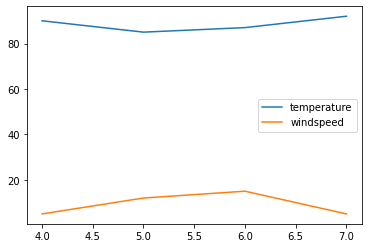

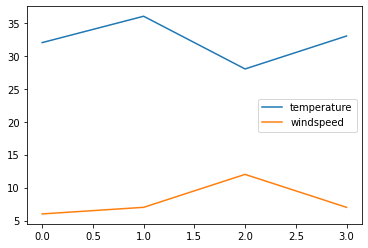

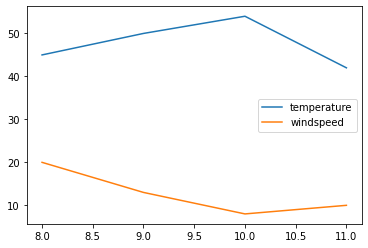

In [ ]:
# 5.	Group By (Split Apply Combine)
# -	Upload 2 files " weather_by_cities.csv" to your google drive "My Drive/Colab Notebooks/"
# -	Mount google colab to your drive
%cd /content/drive/My Drive/Colab Notebooks

import pandas as pd
df = pd.read_csv("weather_by_cities.csv")
df
g = df.groupby("city")
g

for city, data in g:
    print("city:",city)
    print("\n")
    print("data:",data)

g.get_group('mumbai')

g.max()

g.mean()

g.min()

g.describe()

g.size()
%matplotlib inline 
g.plot()

def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

g = df.groupby(lambda x: grouper(df, x, 'temperature')) 
g

for key, d in g:
    print("Group by Key: {}\n".format(key))
    print(d)


In [ ]:
# 6.	Concat Dataframes
import pandas as pd

india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
india_weather

us_weather = pd.DataFrame({ "city": ["new york","chicago","orlando"], "temperature": [21,14,35], "humidity": [68, 65, 75] }) 
us_weather

df = pd.concat([india_weather, us_weather])
df

df = pd.concat([india_weather, us_weather], ignore_index=True)
df

df = pd.concat([india_weather, us_weather], keys=["india", "us"])
df
df.loc["us"]

df.loc["india"]

temperature_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
}, index=[0,1,2])
temperature_df

windspeed_df = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
}, index=[1,0])
windspeed_df

df = pd.concat([temperature_df,windspeed_df],axis=1)
df

s = pd.Series(["Humid","Dry","Rain"], name="event")
s

df = pd.concat([temperature_df,s],axis=1)
df


,city,temperature,event
0,mumbai,32,Humid
1,delhi,45,Dry
2,banglore,30,Rain


In [6]:
# Part 2.	Write the program to display the first 5 and last 5 rows in "Automobile_data.csv" (in file "Lab8 Pandas-III.zip")
import pandas as pd

df = pd.read_csv("Automobile_data.csv")
print(df.head(n=5))
print(df.tail(n=5))



   index      company   body-style  wheel-base  length engine-type  \
0      0  alfa-romero  convertible        88.6   168.8        dohc   
1      1  alfa-romero  convertible        88.6   168.8        dohc   
2      2  alfa-romero    hatchback        94.5   171.2        ohcv   
3      3         audi        sedan        99.8   176.6         ohc   
4      4         audi        sedan        99.4   176.6         ohc   

  num-of-cylinders  horsepower  average-mileage    price  
0             four         111               21  13495.0  
1             four         111               21  16500.0  
2              six         154               19  16500.0  
3             four         102               24  13950.0  
4             five         115               18  17450.0  
    index     company body-style  wheel-base  length engine-type  \
56     81  volkswagen      sedan        97.3   171.7         ohc   
57     82  volkswagen      sedan        97.3   171.7         ohc   
58     86  volkswagen

In [ ]:
#Part 3. Replace all column values which contain ?, n.a, or NaN and empty with 0 (zero) in "Automobile_data.csv"  as date preprocessing
import pandas as pd
import numpy as np 

df = pd.read_csv("Automobile_data.csv")
print(df)

for column in df:
    df[column] = df[column].replace(['n.a','?', 'NaN', np.NaN], 0)
    
    


In [22]:
# Part 4.	Print the most expansive car’s company name in Python program
import pandas as pd
import numpy as np 
from numpy.ma.core import exp

df = pd.read_csv("Automobile_data.csv")
print(df)

# Replace all column values which contain ?, n.a, or NaN and empty with 0 (zero)
for column in df:
    df[column] = df[column].replace(['n.a','?', 'NaN', np.NaN], 0)

# get the most expensive car 
exp_price = 0.0
index = 0
counter = 0
for row in df['price']:
    if float(row) > exp_price:
        index = counter
        exp_price = row 
    counter+= 1

print( "Most Expensive Care Company is ",df['company'].loc[index] )

    index      company   body-style  wheel-base  length engine-type  \
0       0  alfa-romero  convertible        88.6   168.8        dohc   
1       1  alfa-romero  convertible        88.6   168.8        dohc   
2       2  alfa-romero    hatchback        94.5   171.2        ohcv   
3       3         audi        sedan        99.8   176.6         ohc   
4       4         audi        sedan        99.4   176.6         ohc   
..    ...          ...          ...         ...     ...         ...   
56     81   volkswagen        sedan        97.3   171.7         ohc   
57     82   volkswagen        sedan        97.3   171.7         ohc   
58     86   volkswagen        sedan        97.3   171.7         ohc   
59     87        volvo        sedan       104.3   188.8         ohc   
60     88        volvo        wagon       104.3   188.8         ohc   

   num-of-cylinders  horsepower  average-mileage    price  
0              four         111               21  13495.0  
1              four        

In [32]:
from typing import Dict
#Part 5.	Find all cars information from Toyota company
import pandas as pd
import numpy as np 

# import data 

df = pd.read_csv("Automobile_data.csv")

# Replace all column values which contain ?, n.a, or NaN and empty with 0 (zero)
for column in df:
    df[column] = df[column].replace(['n.a','?', 'NaN', np.NaN], 0)

# get Toyota cars information 
car_company= df.groupby('company')
toyota_cars = car_company.get_group('toyota')
print(toyota_cars)
    

    index company body-style  wheel-base  length engine-type num-of-cylinders  \
48     66  toyota  hatchback        95.7   158.7         ohc             four   
49     67  toyota  hatchback        95.7   158.7         ohc             four   
50     68  toyota  hatchback        95.7   158.7         ohc             four   
51     69  toyota      wagon        95.7   169.7         ohc             four   
52     70  toyota      wagon        95.7   169.7         ohc             four   
53     71  toyota      wagon        95.7   169.7         ohc             four   
54     79  toyota      wagon       104.5   187.8        dohc              six   

    horsepower  average-mileage    price  
48          62               35   5348.0  
49          62               31   6338.0  
50          62               31   6488.0  
51          62               31   6918.0  
52          62               27   7898.0  
53          62               27   8778.0  
54         156               19  15750.0  


In [33]:
#Part 6.	Write the program to display total cars for each company

import pandas as pd
import numpy as np 

# import data 

df = pd.read_csv("Automobile_data.csv")

# Replace all column values which contain ?, n.a, or NaN and empty with 0 (zero)
for column in df:
    df[column] = df[column].replace(['n.a','?', 'NaN', np.NaN], 0)
    
# display total cars for each company
df['company'].value_counts()

toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
isuzu            3
jaguar           3
porsche          3
dodge            2
volvo            2
Name: company, dtype: int64